In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("Customer Churn.csv")

In [3]:
df.shape

(3150, 14)

In [4]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [6]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [7]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [8]:
df.duplicated().sum()

300

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(2850, 14)

In [12]:
df = df.drop(columns=['Age'])

In [13]:
df['Churn'].value_counts()

Churn
0    2404
1     446
Name: count, dtype: int64

C:\Users\maliv\AppData\Local\Temp\ipykernel_3036\2160600343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


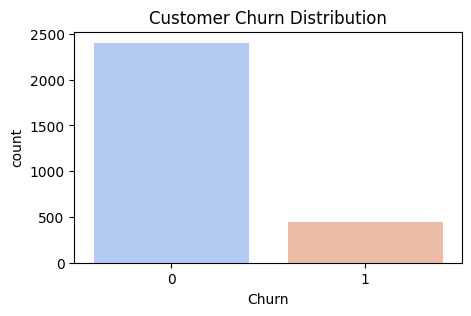

In [14]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Customer Churn Distribution")
plt.show()

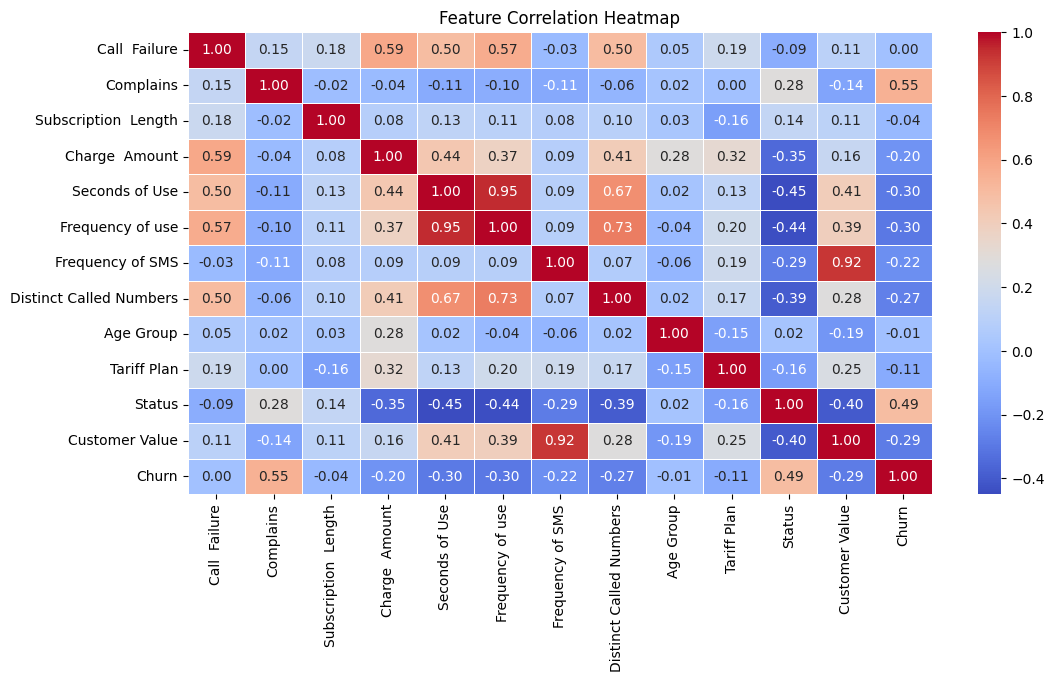

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
df['Tariff Plan'].value_counts()

Tariff Plan
1    2621
2     229
Name: count, dtype: int64

In [17]:
df['Status'].value_counts()

Status
1    2166
2     684
Name: count, dtype: int64

In [18]:
df['Age Group'].value_counts()

Age Group
3    1296
2     921
4     367
5     154
1     112
Name: count, dtype: int64

In [19]:
df.columns = df.columns.str.strip()  # Remove any unwanted spaces

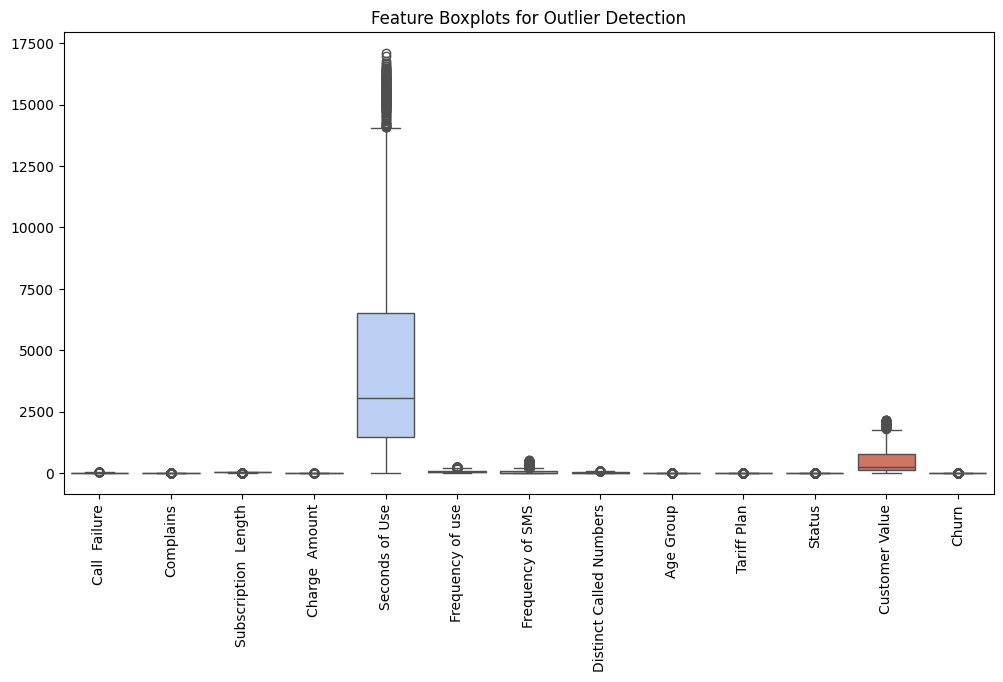

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Feature Boxplots for Outlier Detection")
plt.show()

In [21]:
print([col for col in df.columns if 'Subscription' in col])

['Subscription  Length']


In [22]:
df.rename(columns={'Subscription  Length': 'Subscription Length'}, inplace=True)

C:\Users\maliv\AppData\Local\Temp\ipykernel_3036\411644310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Subscription Length', data=df, palette='coolwarm')


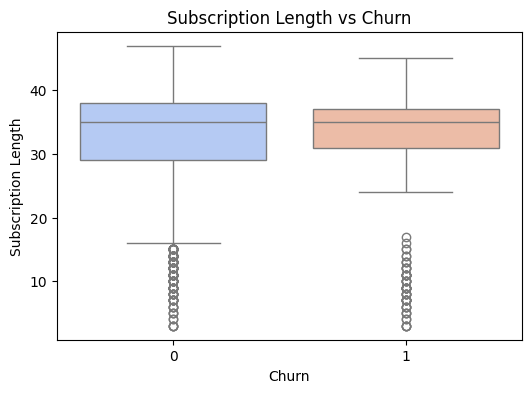

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Subscription Length', data=df, palette='coolwarm')
plt.title("Subscription Length vs Churn")
plt.show()

C:\Users\maliv\AppData\Local\Temp\ipykernel_3036\4082279675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charge  Amount', data=df, palette='coolwarm')


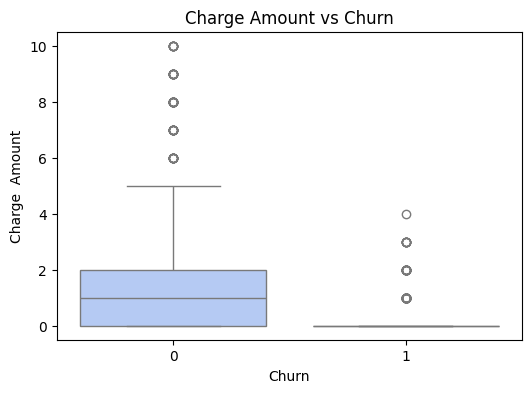

In [24]:
# Relationship between Charge Amount & Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Charge  Amount', data=df, palette='coolwarm')
plt.title("Charge Amount vs Churn")
plt.show()

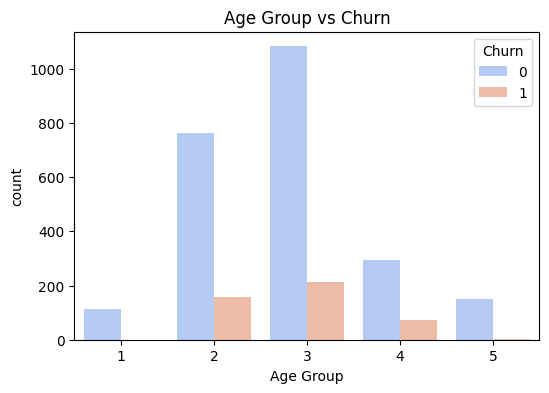

In [25]:
# Relationship between Age Group & Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Age Group', hue='Churn', data=df, palette='coolwarm')
plt.title("Age Group vs Churn")
plt.show()

In [26]:
# Outlier detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [27]:
# Removing extreme outliers (1.5 * IQR rule)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value', 'Churn'],
      dtype='object')

In [29]:
# Feature Engineering
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
feature_cols = ['Subscription Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Customer Value']
X_poly = poly.fit_transform(df[feature_cols])
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(feature_cols))
df = pd.concat([df, df_poly], axis=1)

In [30]:
# Log transformation to reduce skewness
df['Seconds of Use'] = np.log1p(df['Seconds of Use'])

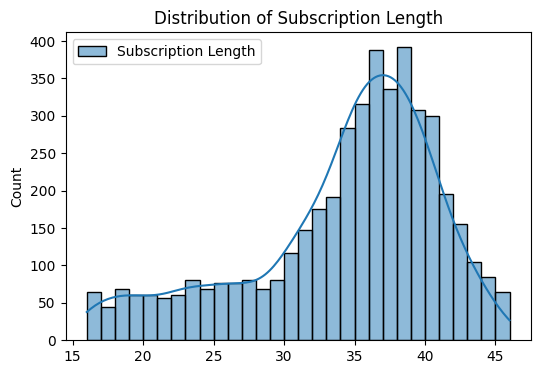

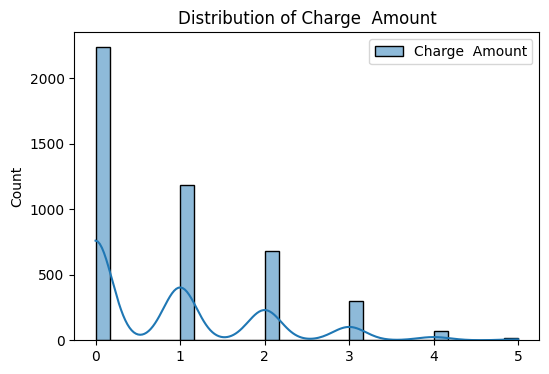

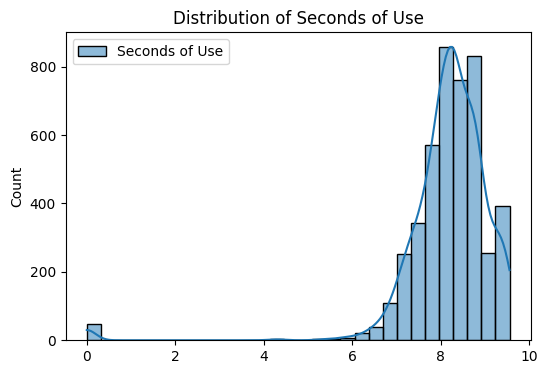

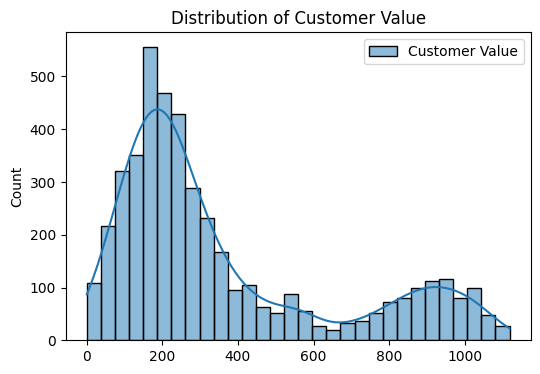

In [31]:
def plot_distribution(col):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Plot distributions
for col in ['Subscription Length', 'Charge  Amount', 'Seconds of Use', 'Customer Value']:
    plot_distribution(col)

In [32]:
# Convert categorical features to numeric
df['Tariff Plan'] = df['Tariff Plan'].map({1: 0, 2: 1})
df['Status'] = df['Status'].map({1: 0, 2: 1})

In [33]:
df['Tariff Plan'].value_counts()

Tariff Plan
0.0    1125
Name: count, dtype: int64

In [34]:
# Define features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [35]:
X.fillna(X.median(), inplace=True)  # Fill with median (better for skewed data)
y.fillna(y.median(), inplace=True)  # Fill with median (better for skewed data)

In [36]:
# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead